## Работа с библиотекой tensorflow. Пример нейронной сети на MNIST

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from skimage.transform import resize
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
# Параметры
size = 30
epochs_num = 20
batch_num = 256

In [4]:
# Загрузка датасета
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# Изменение размера изображений

x_train = np.array([resize(img, (size, size), anti_aliasing=True) for img in x_train])

x_test = np.array([resize(img, (size, size), anti_aliasing=True) for img in x_test])

In [6]:
# Нормализация данных
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(x_train.shape)
print(x_test.shape)

(60000, 30, 30, 1)
(10000, 30, 30, 1)


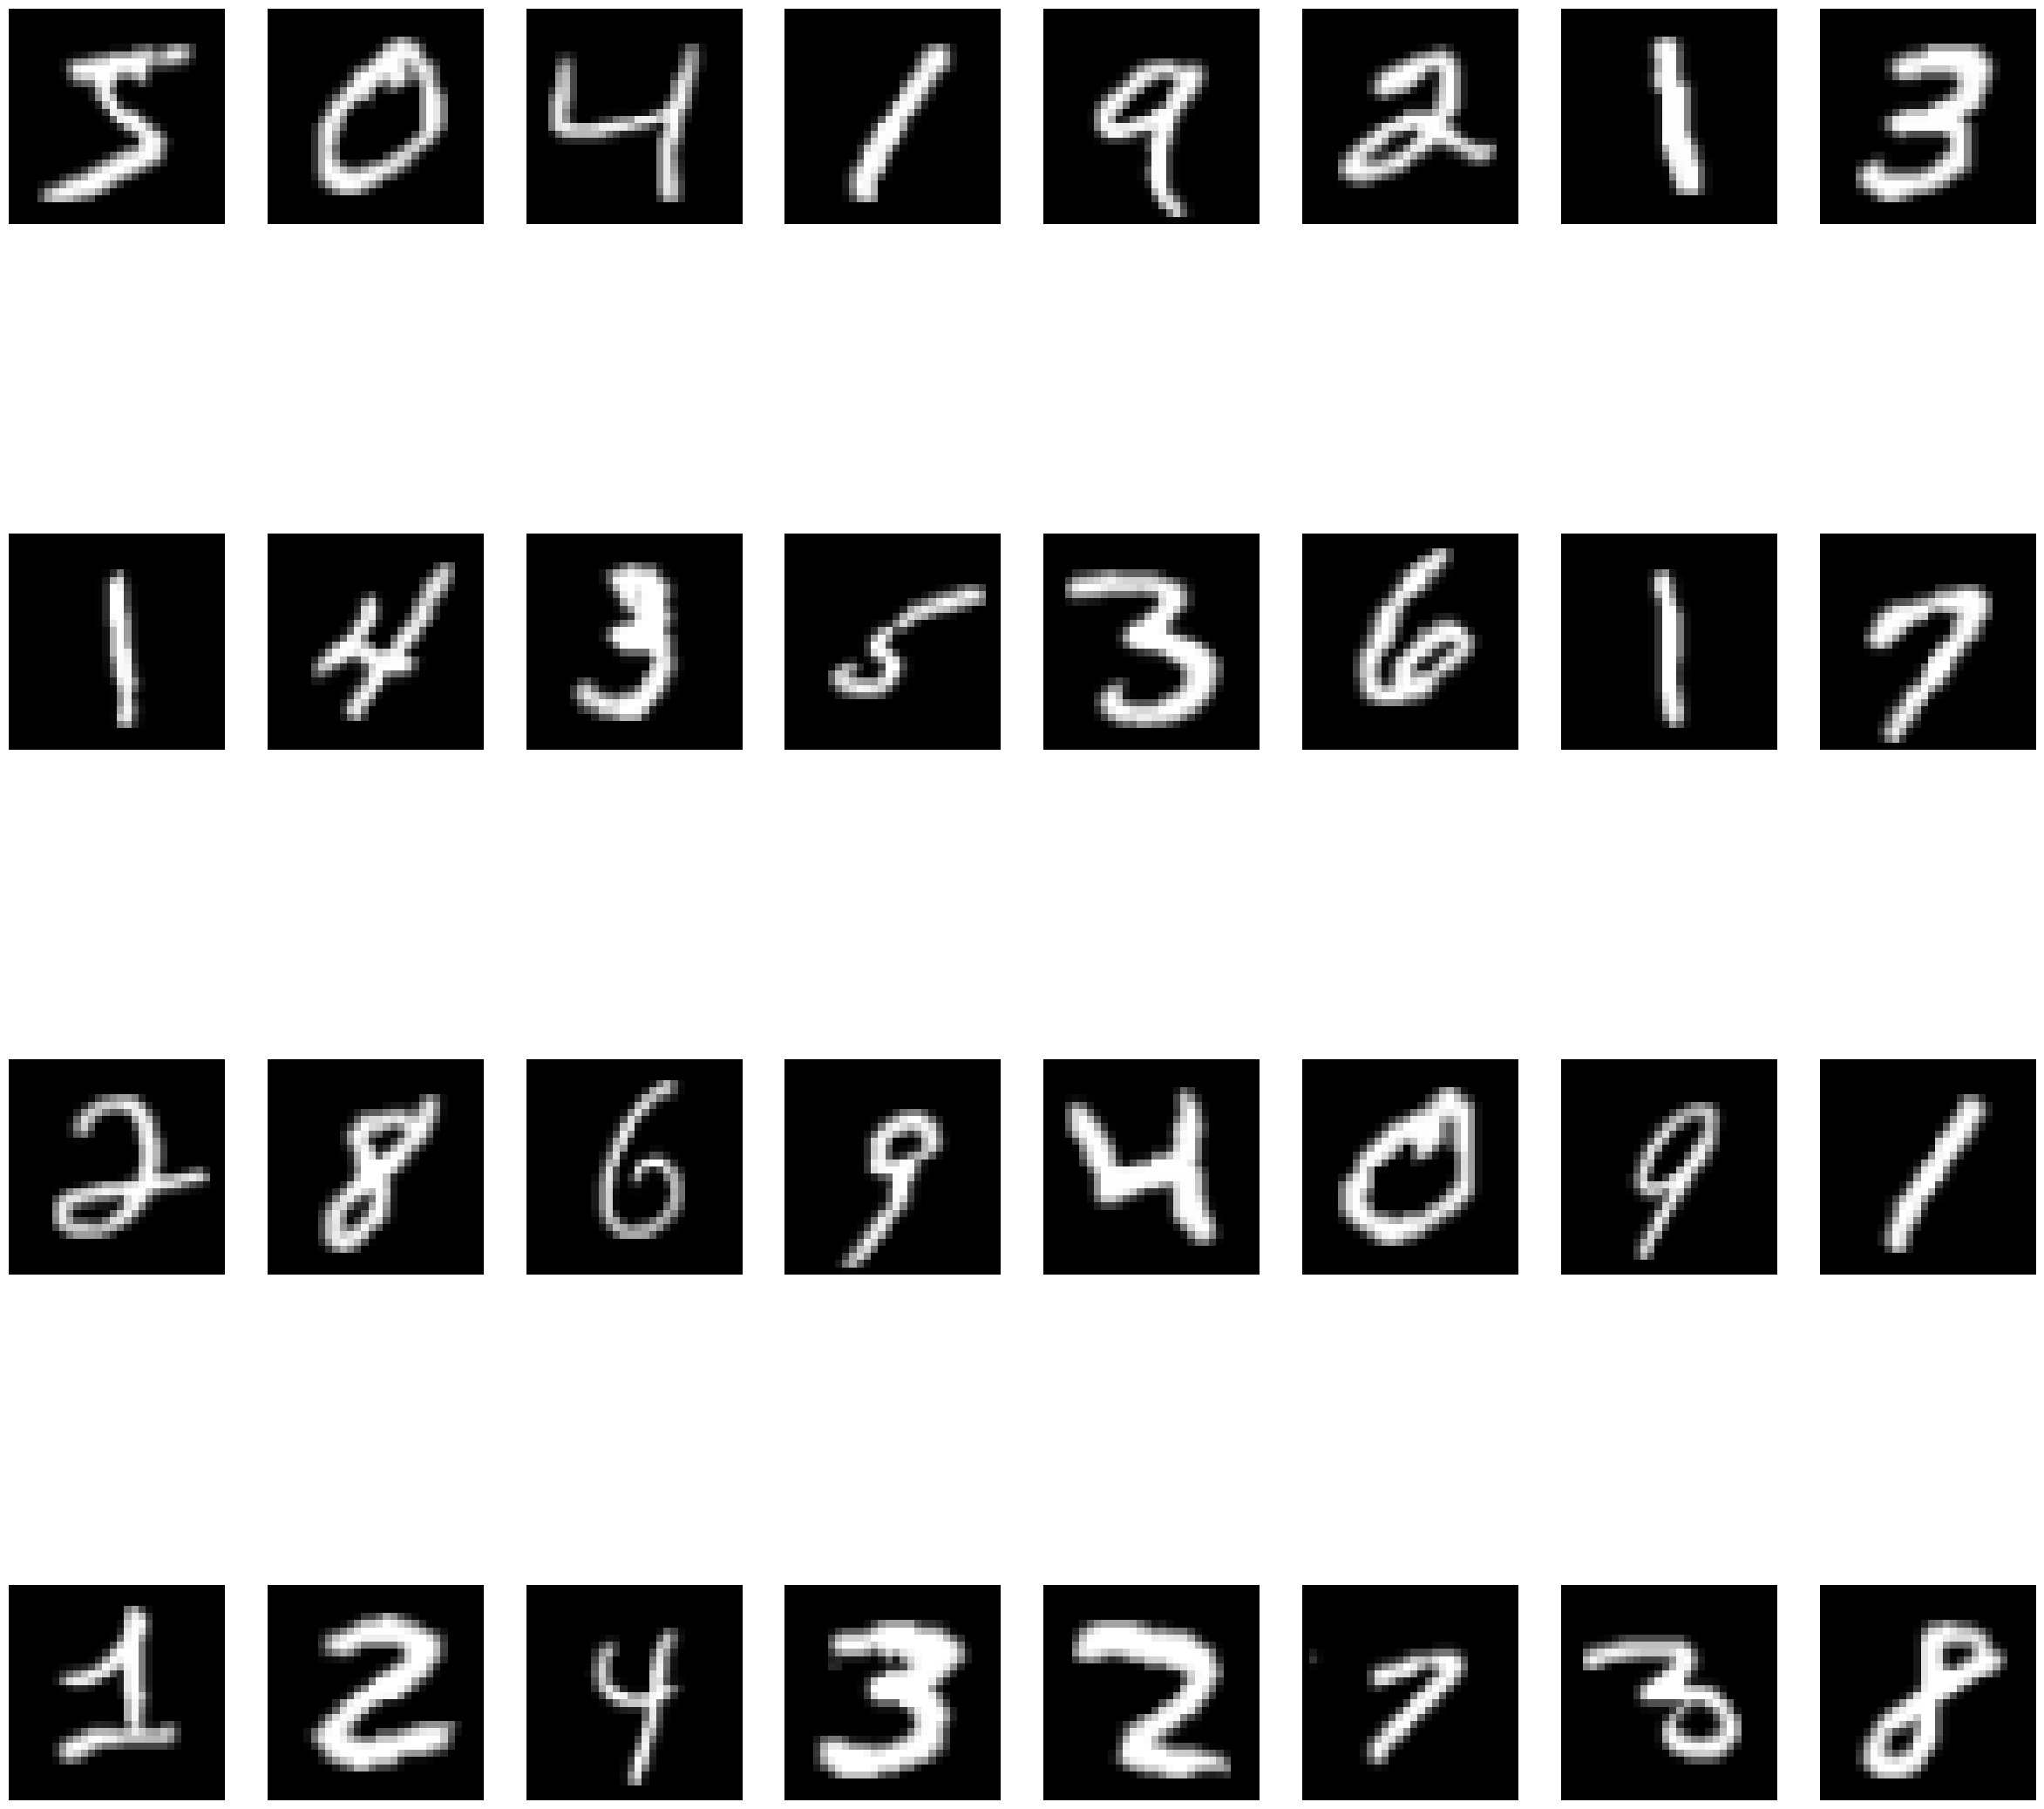

In [7]:
# Визуализация данных
plt.figure(figsize=(size, size))
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()

In [8]:
# Преобразование меток в one-hot кодирование
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [9]:
# Создание модели
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(size, size, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

### как связан размер слоя с количеством классов?

In [10]:
# Компиляция модели
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Обучение модели
model.fit(x_train, y_train, epochs=epochs_num, batch_size=batch_num)

Epoch 1/20
235/235 [==============================] - 8s 34ms/step - loss: 1.2811 - accuracy: 0.5912
Epoch 2/20
235/235 [==============================] - 9s 37ms/step - loss: 0.3686 - accuracy: 0.8895
Epoch 3/20
235/235 [==============================] - 9s 38ms/step - loss: 0.2752 - accuracy: 0.9170
Epoch 4/20
235/235 [==============================] - 9s 37ms/step - loss: 0.2130 - accuracy: 0.9363
Epoch 5/20
235/235 [==============================] - 8s 35ms/step - loss: 0.1678 - accuracy: 0.9500
Epoch 6/20
235/235 [==============================] - 8s 36ms/step - loss: 0.1368 - accuracy: 0.9590
Epoch 7/20
235/235 [==============================] - 8s 35ms/step - loss: 0.1137 - accuracy: 0.9658
Epoch 8/20
235/235 [==============================] - 8s 36ms/step - loss: 0.0968 - accuracy: 0.9707
Epoch 9/20
235/235 [==============================] - 8s 36ms/step - loss: 0.0861 - accuracy: 0.9737
Epoch 10/20
235/235 [==============================] - 9s 37ms/step - loss: 0.0779 - accura

In [12]:
# Оценка модели
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Тестовая точность: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0487 - accuracy: 0.9838
Тестовая точность: 0.9837999939918518


313/313 [==============================] - 1s 2ms/step


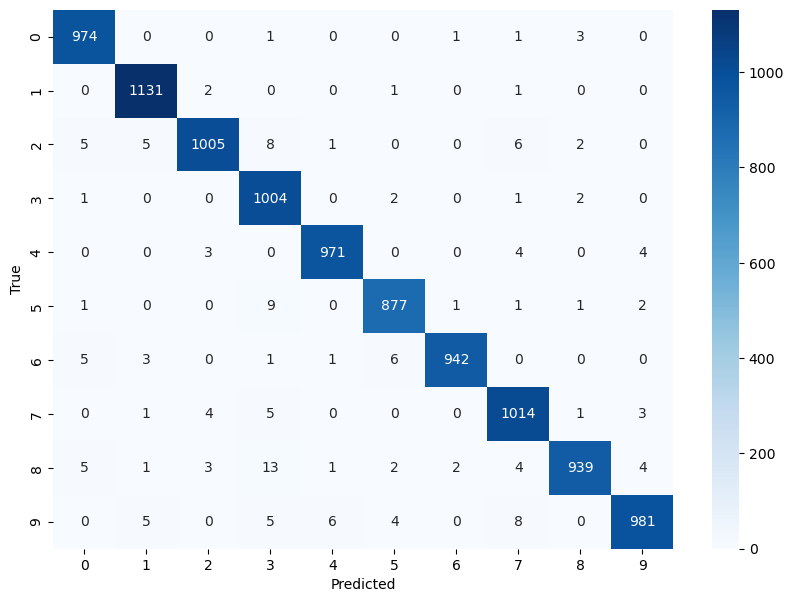

In [23]:
# Визуализация матрицы ошибок

true_labels = np.argmax(y_test, axis=1)
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(true_labels, predictions)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Тестирование на случайном изображении из mnist

313/313 [==============================] - 1s 2ms/step
Предсказанная метка: 0


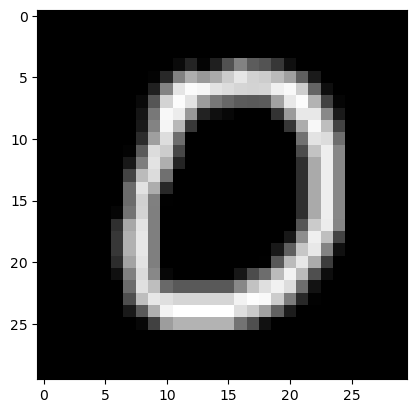

In [24]:
# Прогнозирование на случайном изображении
predictions = model.predict(x_test)

# Выводим предсказание для первого изображения
predicted_label = np.argmax(predictions[10])
print(f"Предсказанная метка: {predicted_label}")

# Отображаем изображение
plt.imshow(x_test[10].reshape(size, size), cmap='gray')
plt.show()


### Тестирование на реальных данных

1/1 [==============================] - 0s 10ms/step


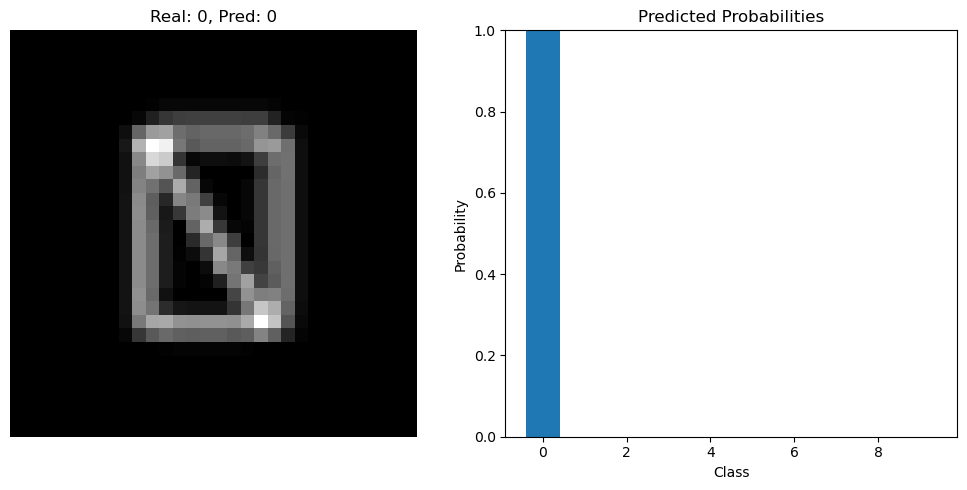

1/1 [==============================] - 0s 8ms/step


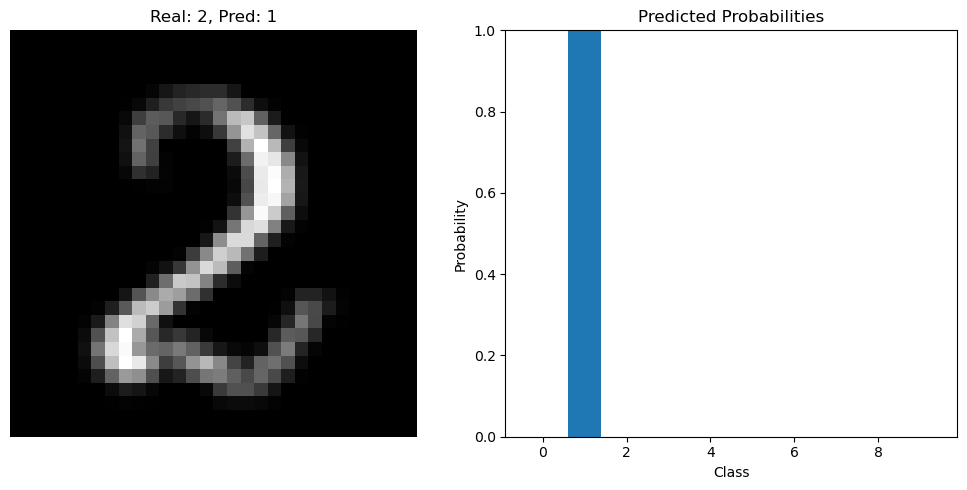

1/1 [==============================] - 0s 8ms/step


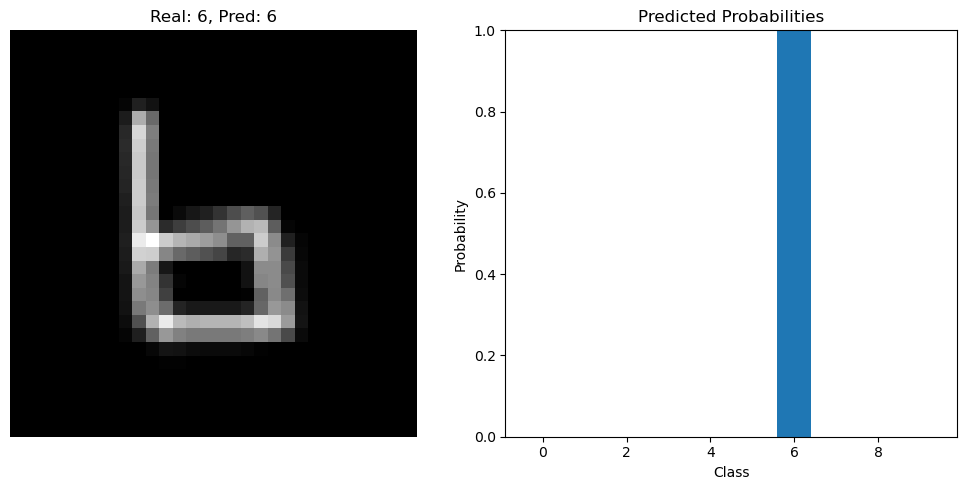

1/1 [==============================] - 0s 9ms/step


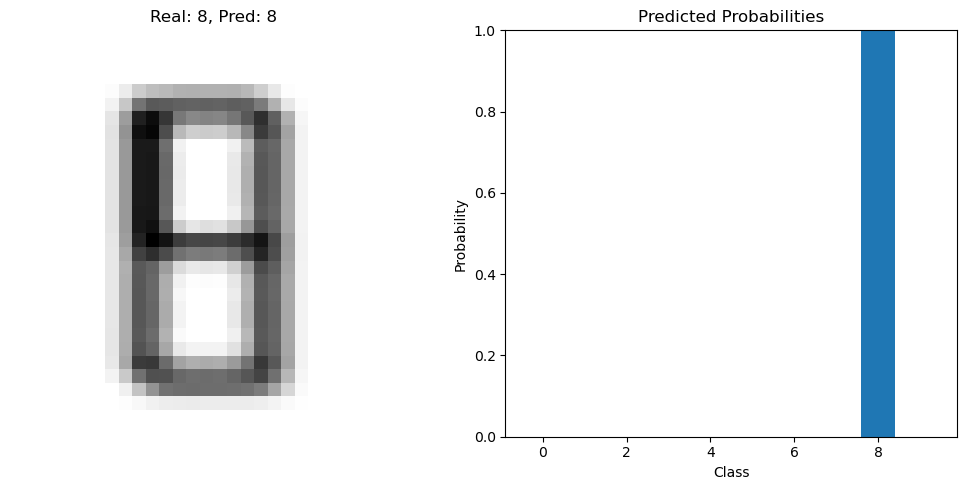

In [25]:
real_labels = [0, 2, 6, 8]
image_files = ['zero.jpeg', 'two.jpeg', 'six.jpeg', 'eigth.jpeg']
i = -1
threshold = 0.7

for img_name in image_files:
    # Работа с картинкой
    img = Image.open(img_name)

    img = img.convert('L')
    img = img.resize((20, 20))
    img = img.resize((size, size))

    img_array = np.array(img) / 255.0
#     img_array = (img_array > threshold).astype(np.float32)
    img_array = np.expand_dims(img_array, axis=-1)
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    pred_label = np.argmax(predictions[0])
    i+=1

    # Визуализация
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Real: {real_labels[i]}, Pred: {pred_label}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.bar(range(10), predictions[0])
    plt.title("Predicted Probabilities")
    plt.xlabel("Class")
    plt.ylabel("Probability")
    plt.ylim(0, 1)

    # Показываем оба графика рядом
    plt.tight_layout()
    plt.show()

